# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

    We'll define per-bottle profit as State Bottle Retail − State Bottle Cost, and total profit per item as per-bottle profit × Bottles Sold. This prioritizes items that both have good margins and sell many bottles. The reason for this method of calculating profit is that because a high margin item with negligible sales doesn't drive store profit, and a high-volume item with tiny margins may not be the most profitable. Multiplying the two captures economic impact more directly.

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/iowa.csv")
df.columns = [c.strip() for c in df.columns]

df["per_bottle_profit"] = df["State Bottle Retail"] - df["State Bottle Cost"]
df["row_total_profit"] = df["per_bottle_profit"] * df["Bottles Sold"]

profits = (df
    .groupby("Item Description", as_index=False)
    .agg(total_profit=("row_total_profit", "sum"),
         total_bottles=("Bottles Sold", "sum"),
         avg_margin=("per_bottle_profit", "mean"))
    .sort_values("total_profit", ascending=False)
)

profits.head(10)

,Item Description,total_profit,total_bottles,avg_margin
5022,TITOS HANDMADE VODKA,364074.35,57263,5.969286
636,BLACK VELVET,274676.85,76184,3.433353
1854,FIREBALL CINNAMON WHISKEY,187535.22,97308,3.749808
1323,CROWN ROYAL,160981.95,19817,8.305232
1358,CROWN ROYAL REGAL APPLE,122880.40,16250,7.881308
1022,CAPTAIN MORGAN SPICED RUM,121115.30,20822,5.908933
2349,HAWKEYE VODKA,116375.04,53675,2.364754
992,CAPTAIN MORGAN ORIGINAL SPICED,112146.71,22750,4.921577
2564,JACK DANIELS OLD #7 BLACK LABEL,111509.09,12592,9.200789
2376,HENNESSY VS,108459.45,18855,6.519926


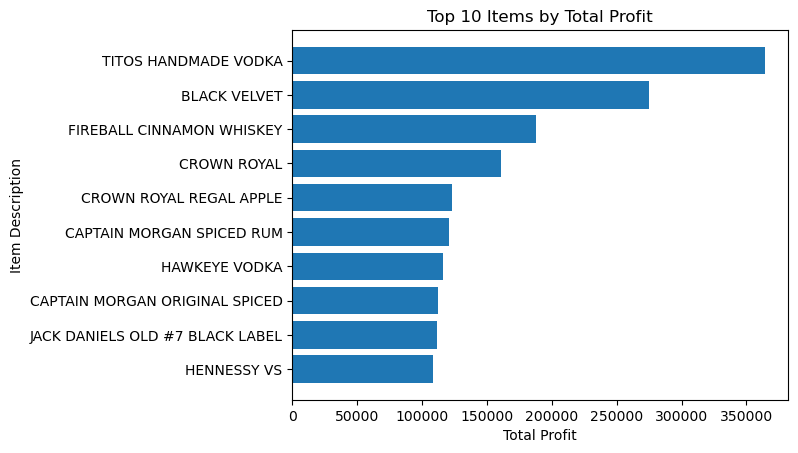

In [24]:
import matplotlib.pyplot as plt

top_n = 10
top = profits.head(top_n)

plt.figure()
plt.barh(top["Item Description"], top["total_profit"])
plt.gca().invert_yaxis()
plt.xlabel("Total Profit")
plt.ylabel("Item Description")
plt.title(f"Top {min(top_n, len(top))} Items by Total Profit")
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [25]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

print(x-y)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

    When you try to subtract them, there is a ValueError because the shapes don't match.

In [ ]:
X = x.reshape(-1, 1)  
Y = y.reshape(1, -1)  
diff_matrix1 = X - Y   
print(diff_matrix1)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


    This subtraction worked because the shapes match and the broadcasting rule is applied.

In [ ]:
X = x.reshape(1, -1)
Y = y.reshape(-1, 1)
diff_matrix2 = X - Y
print(diff_matrix2)

[[-1  1  3]
 [-4 -2  0]]


    This subtraction worked because the shapes match and the broadcasting rule is applied but the result is 
    different than the previous one because the reshaping is different.

In [ ]:
M1 = []
for i in range(len(x)):
    row = []
    for j in range(len(y)):
        row.append(x[i] - y[j])
    M1.append(row)
M1 = np.array(M1, dtype=float)

np.allclose(M1, diff_matrix), M1.shape, M1

(True,
 (3, 2),
 array([[-1., -4.],
        [ 1., -2.],
        [ 3.,  0.]]))

In [ ]:
M2 = np.zeros((len(x), len(y)), dtype=float)
for i in range(len(x)):
    for j in range(len(y)):
        M2[i, j] = x[i] - y[j]

np.allclose(M2, diff_matrix), np.allclose(M2, M1), M2.shape, M2

(True,
 True,
 (3, 2),
 array([[-1., -4.],
        [ 1., -2.],
        [ 3.,  0.]]))

    x.reshape(1, -1) turns a length-n 1D array into a row vector with shape (1, n), while x.reshape(-1, 1) makes a column vector with shape (n, 1). This matters for broadcasting since combining an (n, 1) array with a (1, m) array yields an (n, m) arrangement.

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

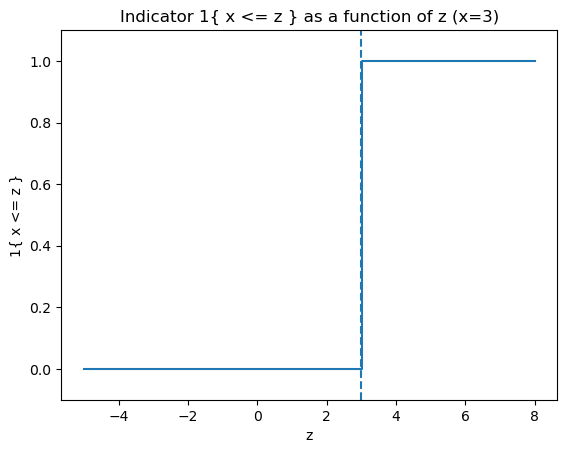

In [ ]:
x_val = 3.0
z = np.linspace(-5, 8, 400)
indicator = (x_val <= z).astype(int)

plt.figure()
plt.step(z, indicator, where="post")
plt.axvline(x_val, linestyle="--")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("1{ x <= z }")
plt.title("Indicator 1{ x <= z } as a function of z (x=3)")
plt.show()

For any fixed (x,z), exactly one of  $x\le z$ or $x>z$ is true. Thus the indicator of the complement, $\mathbf{1}\{x>z\}$, equals $1$ minus the indicator $\mathbf{1}\{x\le z\}$.  (You can also see this in the plot above: the two functions swap 0/1 across $z=x$.)

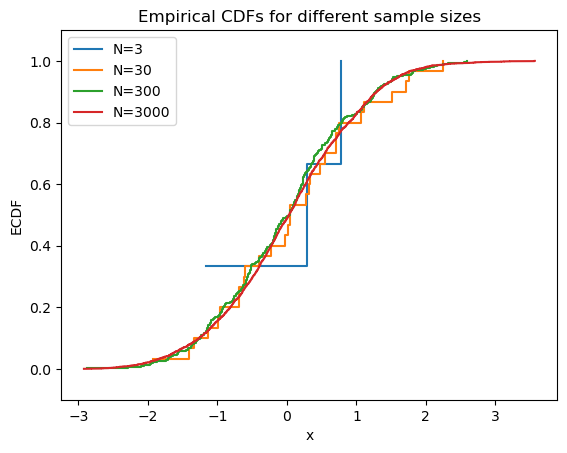

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ECDF helper function
def ecdf(x):
    x = np.asarray(x, dtype=float).ravel()
    x = np.sort(x)
    n = x.size
    y = np.arange(1, n + 1) / n
    return x, y 

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    x, y = ecdf(X)
    plt.step(x, y, where="post", label=f"N={N}")
    plt.xlabel("x")
    plt.ylabel("ECDF")
    plt.title("Empirical CDFs for different sample sizes")
    plt.ylim(-0.1, 1.1)
    plt.legend()
plt.show()



    As N increases, the ECDF curve smoothens out because there are more samples to average over causing a smoother line. One could think of it similarly to the resolution of a screen, the better resolution, the sharper teh picture quality is.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [ ]:
def my_quantile(a, q):
    a = np.asarray(a, dtype=float).ravel()
    a = a[~np.isnan(a)]
    if len(a) == 0:
        return np.nan
    if q <= 0: 
        return float(np.min(a))
    if q >= 1:
        return float(np.max(a))
    a_sorted = np.sort(a)
    n = len(a_sorted)
    pos = q * (n - 1)           # [0, n-1]
    lo = int(np.floor(pos))
    hi = int(np.ceil(pos))
    if lo == hi:
        return float(a_sorted[lo])
    weight = pos - lo
    return float(a_sorted[lo] * (1 - weight) + a_sorted[hi] * weight)

In [ ]:
def iqr_and_whiskers(a):
    q1 = my_quantile(a, 0.25)
    q3 = my_quantile(a, 0.75)
    iqr = q3 - q1
    whisker_low = q1 - 1.5 * iqr
    whisker_high = q3 + 1.5 * iqr
    return {"q1": q1, "q3": q3, "iqr": iqr, "whisker_low": whisker_low, "whisker_high": whisker_high}

In [ ]:
def five_number_plus_whiskers(a):
    a = np.asarray(a, dtype=float)
    a = a[~np.isnan(a)]
    return {
        "min": float(np.min(a)),
        "q1": my_quantile(a, 0.25),
        "median": my_quantile(a, 0.50),
        "q3": my_quantile(a, 0.75),
        "max": float(np.max(a)),
        **iqr_and_whiskers(a)
    }

In [ ]:
def outliers_bool_custom(a):
    a = np.asarray(a, dtype=float).ravel()
    stats = iqr_and_whiskers(a)
    return (a < stats["whisker_low"]) | (a > stats["whisker_high"])

Custom five-number + whiskers:
 {'min': -0.09027529589850945, 'q1': -0.03422906805670789, 'median': -0.007283766209687899, 'q3': 0.03124801543155069, 'max': 0.17055522598064407, 'iqr': 0.06547708348825858, 'whisker_low': -0.13244469328909575, 'whisker_high': 0.12946364066393856}

Pandas describe():
 count    4.420000e+02
mean    -2.245564e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64


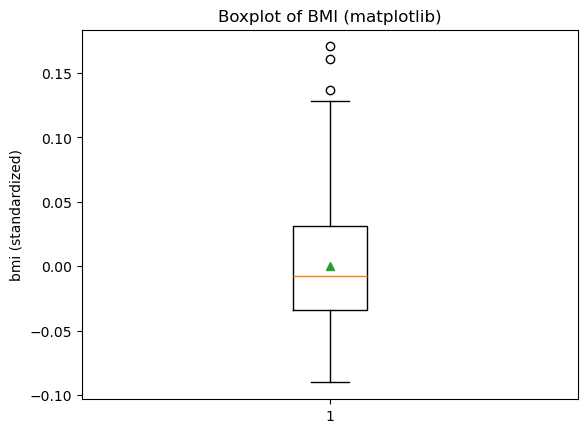

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

data = load_diabetes()
df_diab = pd.DataFrame(data.data, columns=data.feature_names)
s = df_diab["bmi"]

summary_custom = five_number_plus_whiskers(s.values)
desc = s.describe()

print("Custom five-number + whiskers:\n", summary_custom)
print("\nPandas describe():\n", desc)

plt.figure()
plt.boxplot(s.values, vert=True, showmeans=True)
plt.title("Boxplot of BMI (matplotlib)")
plt.ylabel("bmi (standardized)")
plt.show()

is_out = outliers_bool_custom(s.values)
print(is_out)

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?